In [1]:
import os
import geopandas as gp
import pandas as pd
wd = os.getcwd()
prec_fold = os.path.join(wd,'prec_files')
raw = os.path.join(prec_fold,'raw-from-source')

In [2]:
#Import Files needed
vest = gp.read_file(os.path.join(raw,'missing_precincts.shp'))
nc22 = gp.read_file(os.path.join(raw,'SBE_PRECINCTS_20220831.shp'))

In [3]:
#View the VEST data and dissolve just to have one shape for performing the symmetric difference (not a requirement though)
display(vest)
vest['HOLD'] = 'DIS'
vest_dis = vest.dissolve(by='HOLD')
display(vest_dis)

,PREC_ID,ENR_DESC,COUNTY_NAM,COUNTY_ID,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20PREOWRI,...,G20SACDSHI,G20SACRGOR,G20SACDCUB,G20SACRDIL,G20SACDSTY,G20SACRCAR,G20SACDYOU,G20SACRGRI,G20SACDBRO,geometry
0,CV,CV_CAROLINA VILLAGE,HENDERSON,45,213,243,1,2,1,0,...,198,222,205,234,191,224,203,222,202,"POLYGON ((973321.651 597985.741, 973249.732 59..."
1,01-07A,01-07A,WAKE,92,44,194,0,0,0,0,...,189,41,185,35,195,38,193,36,194,"MULTIPOLYGON (((2104589.500 741442.312, 210458..."
2,07-07A,07-07A,WAKE,92,182,335,1,1,0,2,...,279,191,279,212,265,193,270,185,278,"POLYGON ((2096537.911 775663.634, 2096510.875 ..."


,geometry,PREC_ID,ENR_DESC,COUNTY_NAM,COUNTY_ID,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,...,G20SACRWOO,G20SACDSHI,G20SACRGOR,G20SACDCUB,G20SACRDIL,G20SACDSTY,G20SACRCAR,G20SACDYOU,G20SACRGRI,G20SACDBRO
HOLD,,,,,,,,,,,,,,,,,,,,,
DIS,"MULTIPOLYGON (((973261.406 597916.117, 973281....",CV,CV_CAROLINA VILLAGE,HENDERSON,45,213,243,1,2,1,...,231,198,222,205,234,191,224,203,222,202


In [5]:
#Set CRS and perform symmetric difference to make holes where precincts will go
crs = nc22.crs
vest_dis = vest_dis.to_crs(crs)
nc22_holes = gp.overlay(nc22,vest_dis,how='symmetric_difference')

2652
2653


,id,prec_id,enr_desc,county_nam,of_prec_id,county_id,geometry


,id,prec_id,enr_desc,county_nam,of_prec_id,county_id,PREC_ID,ENR_DESC,COUNTY_NAM,COUNTY_ID,...,G20SACDSHI,G20SACRGOR,G20SACDCUB,G20SACRDIL,G20SACDSTY,G20SACRCAR,G20SACDYOU,G20SACRGRI,G20SACDBRO,geometry
2652,NaN,NaN,NaN,NaN,NaN,NaN,CV,CV_CAROLINA VILLAGE,HENDERSON,45.0,...,198.0,222.0,205.0,234.0,191.0,224.0,203.0,222.0,202.0,"POLYGON ((970913.231 599176.888, 970913.231 59..."


2652


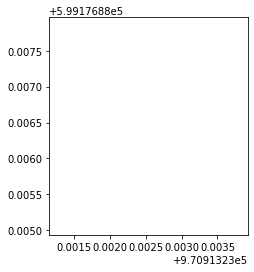

In [10]:
#Remove the one value that was added (it's just a little line as the extents don't exactly match up, this is okay though)
print(len(nc22))
print(len(nc22_holes))
display(nc22[nc22['county_nam'].isna()])
display(nc22_holes[nc22_holes['county_nam'].isna()])
nc22_holes[nc22_holes['county_nam'].isna()].plot()
nc22_holes = nc22_holes[~nc22_holes['county_nam'].isna()]
print(len(nc22_holes))

In [13]:
#Subset out Hendersonville-2 and explode to break up the polygons to clean
hendersonville2 = nc22_holes[nc22_holes['enr_desc']=='HENDERSONVILLE-2']
display(hendersonville2)
hendersonville2_ex = hendersonville2.explode()
display(hendersonville2_ex)

,id,prec_id,enr_desc,county_nam,of_prec_id,county_id,PREC_ID,ENR_DESC,COUNTY_NAM,COUNTY_ID,...,G20SACDSHI,G20SACRGOR,G20SACDCUB,G20SACRDIL,G20SACDSTY,G20SACRCAR,G20SACDYOU,G20SACRGRI,G20SACDBRO,geometry
1844,1968.0,HV-2,HENDERSONVILLE-2,HENDERSON,None,45.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((972037.855 581066.196, 971978...."


C:\Users\SpencerNelson\AppData\Local\Temp\ipykernel_20936\2502020302.py:4: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  hendersonville2_ex = hendersonville2.explode()


id prec_id          enr_desc county_nam of_prec_id  county_id  \
1844 0  1968.0    HV-2  HENDERSONVILLE-2  HENDERSON       None       45.0   
     1  1968.0    HV-2  HENDERSONVILLE-2  HENDERSON       None       45.0   
     2  1968.0    HV-2  HENDERSONVILLE-2  HENDERSON       None       45.0   

       PREC_ID ENR_DESC COUNTY_NAM  COUNTY_ID  ...  G20SACDSHI  G20SACRGOR  \
1844 0     NaN      NaN        NaN        NaN  ...         NaN         NaN   
     1     NaN      NaN        NaN        NaN  ...         NaN         NaN   
     2     NaN      NaN        NaN        NaN  ...         NaN         NaN   

        G20SACDCUB  G20SACRDIL  G20SACDSTY  G20SACRCAR  G20SACDYOU  \
1844 0         NaN         NaN         NaN         NaN         NaN   
     1         NaN         NaN         NaN         NaN         NaN   
     2         NaN         NaN         NaN         NaN         NaN   

        G20SACRGRI  G20SACDBRO  \
1844 0         NaN         NaN   
     1         NaN         NaN   
     2         NaN         NaN   

                                                 geometry  
1844 0  POLYGON ((972037.855 581066.196, 971978.045 58...  
     1  POLYGON ((970912.386 597359.694, 970942.005 59...  
     2  POLYGON ((970658.896 599456.314, 970803.728 59...  

[3 rows x 59 columns]

,level_0,level_1,id,prec_id,enr_desc,county_nam,of_prec_id,county_id,PREC_ID,ENR_DESC,...,G20SACDSHI,G20SACRGOR,G20SACDCUB,G20SACRDIL,G20SACDSTY,G20SACRCAR,G20SACDYOU,G20SACRGRI,G20SACDBRO,geometry
0,1844,0,1968.0,HV-2,HENDERSONVILLE-2,HENDERSON,None,45.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((972037.855 581066.196, 971978.045 58..."
1,1844,1,1968.0,CV,CV_CAROLINA VILLAGE,HENDERSON,None,45.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((970912.386 597359.694, 970942.005 59..."
2,1844,2,1968.0,NE,NORTHEAST,HENDERSON,None,45.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((970658.896 599456.314, 970803.728 59..."


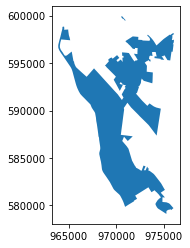

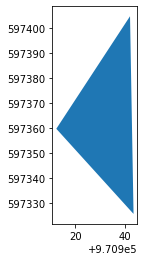

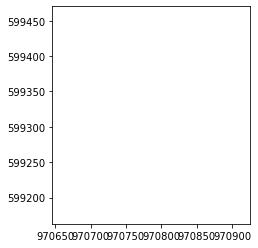

In [14]:
#Reassign values for Hendersonville-2 to the correct precincts
hendersonville2_ex.reset_index(inplace=True,drop=False)
for i in list(hendersonville2_ex['level_1']):
    sub = hendersonville2_ex[hendersonville2_ex['level_1']==i]
    sub.plot() 
hendersonville2_ex['enr_desc'] = ['HENDERSONVILLE-2','CV_CAROLINA VILLAGE','NORTHEAST']
hendersonville2_ex['prec_id'] = ['HV-2','CV','NE']
display(hendersonville2_ex)
#hendersonville2_ex.to_file('./test_hendersonville2.shp')

In [15]:
#Clean VEST columns
vest.rename(columns = {'PREC_ID':'prec_id','ENR_DESC':'enr_desc','COUNTY_NAM':'county_nam'},inplace=True)
vest = vest[['prec_id','enr_desc','county_nam','geometry']]
vest

,prec_id,enr_desc,county_nam,geometry
0,CV,CV_CAROLINA VILLAGE,HENDERSON,"POLYGON ((973321.651 597985.741, 973249.732 59..."
1,01-07A,01-07A,WAKE,"MULTIPOLYGON (((2104589.500 741442.312, 210458..."
2,07-07A,07-07A,WAKE,"POLYGON ((2096537.911 775663.634, 2096510.875 ..."


In [16]:
#Subset out Hendersonville columns so they are uniform
hendersonville2_ex = hendersonville2_ex[['prec_id','enr_desc','county_nam','geometry']]
hendersonville2_ex

,prec_id,enr_desc,county_nam,geometry
0,HV-2,HENDERSONVILLE-2,HENDERSON,"POLYGON ((972037.855 581066.196, 971978.045 58..."
1,CV,CV_CAROLINA VILLAGE,HENDERSON,"POLYGON ((970912.386 597359.694, 970942.005 59..."
2,NE,NORTHEAST,HENDERSON,"POLYGON ((970658.896 599456.314, 970803.728 59..."


In [17]:
#Subset out NC 22 columns so they match the other two dataframes
nc22_holes = nc22_holes[['prec_id','enr_desc','county_nam','geometry']]
display(nc22_holes)
print(len(nc22_holes))

,prec_id,enr_desc,county_nam,geometry
0,0003,ALBEMARLE NUMBER 3,STANLY,"POLYGON ((1644857.853 584760.831, 1644768.728 ..."
1,0003,DREXEL 03,BURKE,"POLYGON ((1220715.101 726879.358, 1220723.026 ..."
2,0019,LINVILLE 01,BURKE,"POLYGON ((1142032.036 735283.149, 1141893.094 ..."
3,0019,RIDENHOUR,STANLY,"POLYGON ((1590551.101 597789.851, 1590587.761 ..."
4,007,007,MECKLENBURG,"POLYGON ((1465943.013 524872.128, 1465762.759 ..."
...,...,...,...,...
2647,JMV,JAMESVILLE,MARTIN,"POLYGON ((2656570.989 769941.315, 2656623.057 ..."
2648,GRF,GRIFFINS,MARTIN,"POLYGON ((2572997.648 730116.690, 2572954.935 ..."
2649,GSN,GOOSE NEST,MARTIN,"POLYGON ((2489121.775 774862.002, 2489165.442 ..."
2650,RBV,ROBERSONVILLE,MARTIN,"POLYGON ((2492739.958 755657.848, 2492576.655 ..."


2652


In [19]:
#Remove Hendersonville-2 from the NC22 file and concat back the exploded and reassigned Hendersonville-2 gdf and the VEST precincts gdf
nc22_holes = nc22_holes[nc22_holes['enr_desc']!='HENDERSONVILLE-2']
full_state = gp.GeoDataFrame(pd.concat([vest,hendersonville2_ex,nc22_holes]),crs=crs)
display(full_state)

,prec_id,enr_desc,county_nam,geometry
0,CV,CV_CAROLINA VILLAGE,HENDERSON,"POLYGON ((973321.651 597985.741, 973249.732 59..."
1,01-07A,01-07A,WAKE,"MULTIPOLYGON (((2104589.500 741442.312, 210458..."
2,07-07A,07-07A,WAKE,"POLYGON ((2096537.911 775663.634, 2096510.875 ..."
0,HV-2,HENDERSONVILLE-2,HENDERSON,"POLYGON ((972037.855 581066.196, 971978.045 58..."
1,CV,CV_CAROLINA VILLAGE,HENDERSON,"POLYGON ((970912.386 597359.694, 970942.005 59..."
...,...,...,...,...
2647,JMV,JAMESVILLE,MARTIN,"POLYGON ((2656570.989 769941.315, 2656623.057 ..."
2648,GRF,GRIFFINS,MARTIN,"POLYGON ((2572997.648 730116.690, 2572954.935 ..."
2649,GSN,GOOSE NEST,MARTIN,"POLYGON ((2489121.775 774862.002, 2489165.442 ..."
2650,RBV,ROBERSONVILLE,MARTIN,"POLYGON ((2492739.958 755657.848, 2492576.655 ..."


In [20]:
#Fill NA for the columns to ensure they get grouped correctly in the dissolve, then perform the dissolve
full_state['enr_desc'] = full_state['enr_desc'].fillna('0')
full_state['prec_id'] = full_state['prec_id'].fillna('0')
full_state['county_nam'] = full_state['county_nam'].fillna('0')
full_state['DIS_COL'] = full_state['prec_id']+full_state['enr_desc'] + full_state['county_nam']
full_state_dis = full_state.dissolve(by='DIS_COL')
print(len(full_state_dis))
print(len(nc22))

2655
2652


In [21]:
#Confirm the length of the new file is the lenght of the original + 3
diff = len(full_state_dis)-len(nc22)
if diff == 3:
    print('Precincts were successfully added.')
else:
    print('There was an issue with adding back the precincts.')

Precincts were successfully added.


In [22]:
full_state_dis.to_file('./full_nc22.shp')